In [75]:
import numpy as np
import pandas as pd

In [76]:
df = pd.read_csv('germany_water.csv')
df.head(5)

,Gravity,Rainfall,Temperature
0,6.613,0.058,280.914
1,-0.515,0.096,286.718
2,-0.094,0.131,291.866
3,-0.237,0.066,286.555
4,0.923,0.108,281.650


In [77]:
X = df[['Gravity','Rainfall','Temperature']]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [6]:
def create_sequence(data,target_col_index = 0,lookback = 3):

    x = []
    y = []

    for i in range(lookback,len(data)):
        x.append(data[i-lookback:i])
        y.append(data[i,target_col_index])

    return np.array(x), np.array(y)    

In [7]:
x,y = create_sequence(scaled, target_col_index=0,lookback=3)
print(x.shape)
print(y.shape)

(136, 3, 3)
(136,)


In [8]:
split = int(0.8*len(scaled))
x_train,x_test = x[:split],x[split:]
y_train,y_test = y[:split],y[split:]

In [9]:
x_LG_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],3))
x_LG_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],3))

In [20]:
#LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout

model_lstm = Sequential([
    LSTM(32,return_sequences = True,input_shape=(x_LG_train.shape[1],x_LG_train.shape[2])),
    Dropout(0.2),
    LSTM(16,return_sequences = False),
    Dropout(0.2),
    Dense(1)
])

In [21]:
model_lstm.compile(optimizer='adam',loss='mean_squared_error')
history_lstm = model_lstm.fit(
    x_LG_train,
    y_train,
    epochs = 50,
    batch_size = 16,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.2552 - val_loss: 0.3115
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1962 - val_loss: 0.2391
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1421 - val_loss: 0.1713
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1020 - val_loss: 0.1096
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0739 - val_loss: 0.0627
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0586 - val_loss: 0.0406
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0566 - val_loss: 0.0371
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0437 - val_loss: 0.0368
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0455 - val_loss: 0.0389
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0422 - val_loss: 0.0415
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0422 - val_loss: 0.0417
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0375 - val_loss: 0.0408


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense,Dropout

model_gru = Sequential([
    GRU(32,return_sequences=True,input_shape = (x_LG_train.shape[1],x_LG_train.shape[2])),
    Dropout(0.2),
    GRU(16,return_sequences = False),
    Dropout(0.2),
    Dense(1)
])

In [25]:
model_gru.compile(optimizer='adam',loss='mean_squared_error')
history_gru = model_gru.fit(
    x_LG_train,
    y_train,
    epochs = 50,
    batch_size = 16,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.2476 - val_loss: 0.2116
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1168 - val_loss: 0.0798
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0588 - val_loss: 0.0382
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0562 - val_loss: 0.0344
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0597 - val_loss: 0.0330
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0421 - val_loss: 0.0356
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0316 - val_loss: 0.0406
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0385 - val_loss: 0.0397
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0398 - val_loss: 0.0404
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0324 - val_loss: 0.0362
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0271 - val_loss: 0.0352
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0302 - val_loss: 0.0347


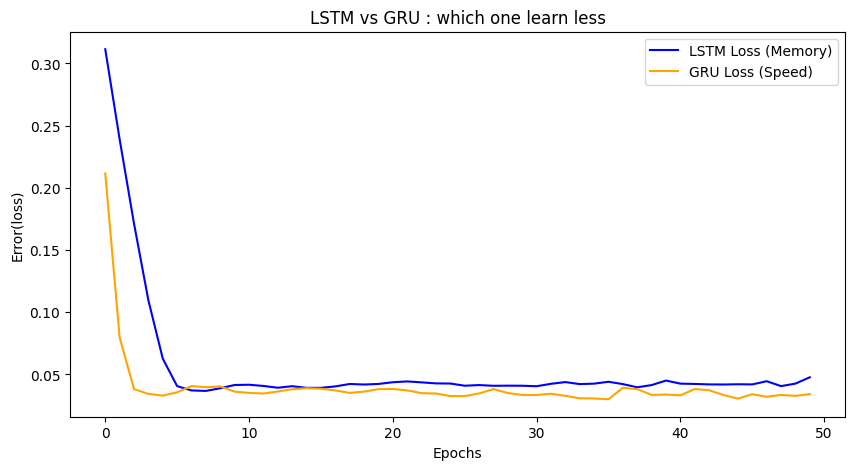

In [26]:
#comparision Graph 

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history_lstm.history['val_loss'],label = 'LSTM Loss (Memory)', color = 'blue')
plt.plot(history_gru.history['val_loss'],label = 'GRU Loss (Speed)',color = 'orange')
plt.title('LSTM vs GRU : which one learn less')
plt.xlabel('Epochs')
plt.ylabel('Error(loss)')
plt.legend()
plt.show()

In [ ]:
#Truth table(no CM in LSTM only Truth table)

y_pred_lstm = model_lstm.predict(x_LG_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
# Makes Dummy array (because scaler 3 features are expect)
dummy_pred = np.zeros((len(y_pred_lstm), 3))
dummy_true = np.zeros((len(y_test), 3))

dummy_pred[:,0] = y_pred_lstm.reshape(-1)
dummy_true[:,0] = y_test.reshape(-1)

y_pred_inv_lstm = scaler.inverse_transform(dummy_pred)[:,0]
y_true_inv = scaler.inverse_transform(dummy_true)[:,0]


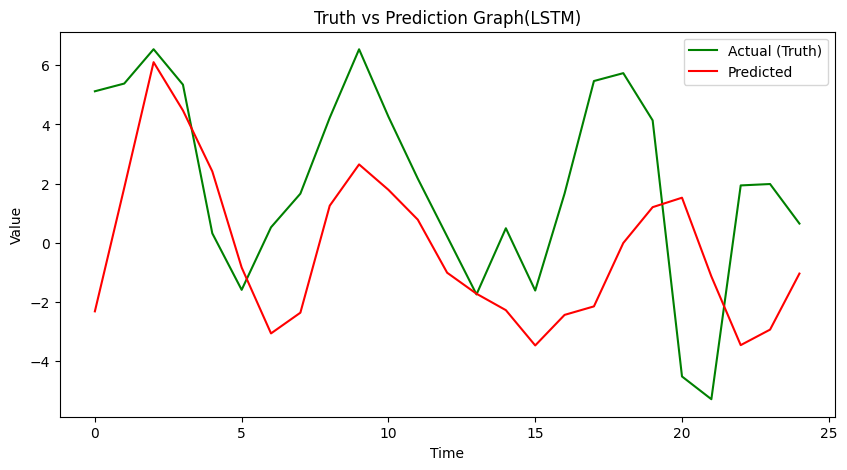

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(y_true_inv, label="Actual (Truth)", color='green')
plt.plot(y_pred_inv_lstm, label="Predicted", color='red')

plt.title("Truth vs Prediction Graph(LSTM)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


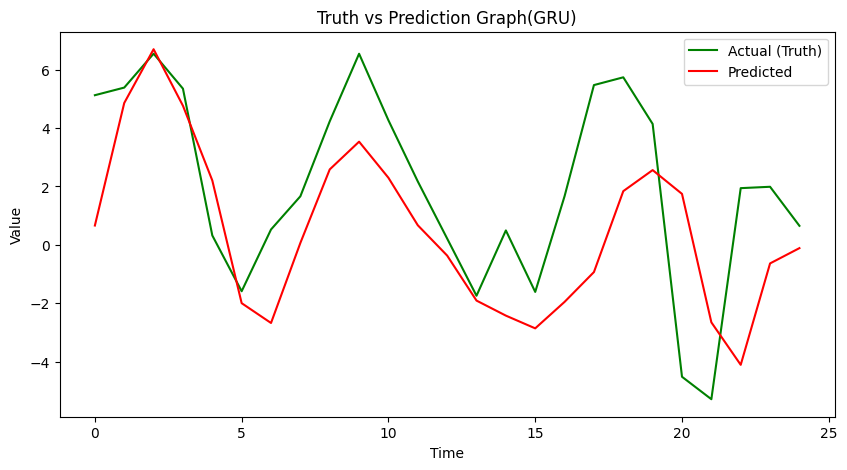

In [ ]:
#Truth table(no CM in GRU only Truth table)

y_pred_gru = model_gru.predict(x_LG_test)



dummy_pred = np.zeros((len(y_pred_gru), 3))
dummy_true = np.zeros((len(y_test), 3))

dummy_pred[:,0] = y_pred_gru.reshape(-1)
dummy_true[:,0] = y_test.reshape(-1)

y_pred_inv_gru = scaler.inverse_transform(dummy_pred)[:,0]
y_true_inv = scaler.inverse_transform(dummy_true)[:,0]


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(y_true_inv, label="Actual (Truth)", color='green')
plt.plot(y_pred_inv_gru, label="Predicted", color='red')

plt.title("Truth vs Prediction Graph(GRU)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Predictions
y_pred_lstm = model_lstm.predict(x_test)
y_pred_gru = model_gru.predict(x_test)

# 2. MSE Calculate
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)

# 3. RMSE (Root Mean Squared Error) more important
rmse_lstm = np.sqrt(mse_lstm)
rmse_gru = np.sqrt(mse_gru)

# 4. Final Report Print
print("========================================")
print("       FINAL MODEL REPORT CARD          ")
print("========================================")
print(f"LSTM Model  ->  MSE: {mse_lstm:.5f}  |  RMSE: {rmse_lstm:.5f}")
print(f"GRU Model   ->  MSE: {mse_gru:.5f}   |  RMSE: {rmse_gru:.5f}")
print("========================================")

if rmse_gru < rmse_lstm:
    print("🏆 WINNER: GRU Model is performing better!")
else:
    print("🏆 WINNER: LSTM Model is performing better!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
       FINAL MODEL REPORT CARD          
LSTM Model  ->  MSE: 0.03593  |  RMSE: 0.18956
GRU Model   ->  MSE: 0.02186   |  RMSE: 0.14786
🏆 WINNER: GRU Model is performing better!


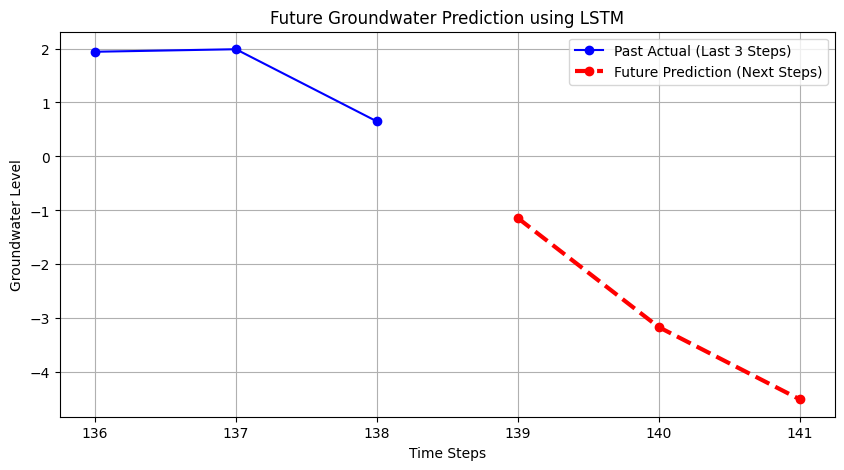

🔴 Red line is future prediction.
If red line is going down → groundwater going down ⚠️


In [ ]:
#Future Pridect LSTM

# lookback are same as in training
lookback = 3

# last 3 timesteps (scaled, with 3 features)
last_data = scaled[-lookback:]          # shape: (3, 3)

# make batch for LSTM
current_batch = last_data.reshape((1, lookback, 3))

future_predictions_scaled = []



# predict next 2 steps (months)
n_future = 3

for step in range(n_future):

    # 1️⃣ Prediction (only Gravity)
    pred_gravity = model_lstm.predict(current_batch, verbose=0)[0][0]
    future_predictions_scaled.append(pred_gravity)

    # 2️⃣ Next make input
    next_step = current_batch[0, -1, :].copy()
    next_step[0] = pred_gravity   # update Gravity only

    # 3️⃣ Update batch (sliding window)
    current_batch = np.append(
        current_batch[:, 1:, :],
        next_step.reshape(1, 1, 3),
        axis=1
    )


# dummy array for inverse transform
dummy_future = np.zeros((len(future_predictions_scaled), 3))
dummy_future[:, 0] = future_predictions_scaled

final_forecast = scaler.inverse_transform(dummy_future)[:, 0]


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Last 3 actual points (time-steps)
past_steps = range(len(df['Gravity']) - 3, len(df['Gravity']))
plt.plot(
    past_steps,
    df['Gravity'].values[-3:],
    label='Past Actual (Last 3 Steps)',
    color='blue',
    marker='o'
)

# Future steps
future_steps = range(len(df['Gravity']), len(df['Gravity']) + n_future)
plt.plot(
    future_steps,
    final_forecast,
    label='Future Prediction (Next Steps)',
    color='red',
    linestyle='--',
    marker='o',
    linewidth=3
)

plt.title('Future Groundwater Prediction using LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Groundwater Level')
plt.legend()
plt.grid(True)
plt.show()

print("🔴 Red line is future prediction.")
print("If red line is going down → groundwater going down ⚠️")




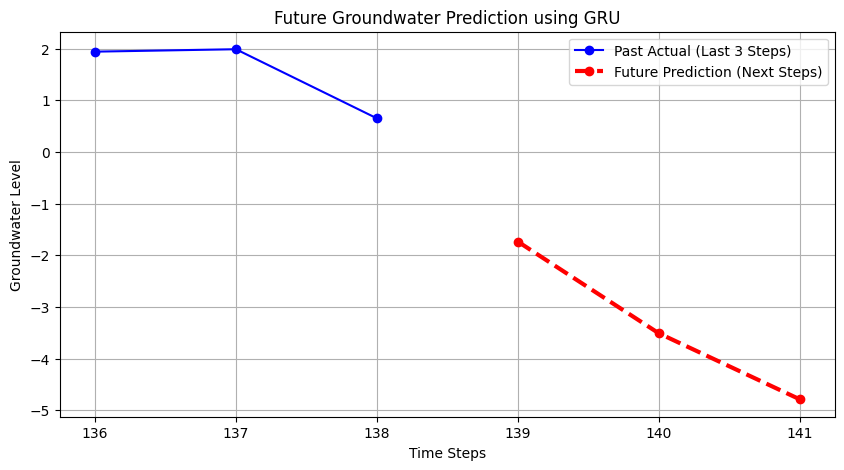

🔴 Red line is future prediction.
If red line is going down → groundwater going down ⚠️


In [ ]:
#Future Pridect GRU


lookback = 3


last_data = scaled[-lookback:]          


current_batch = last_data.reshape((1, lookback, 3))

future_predictions_scaled = []


n_future = 3

for step in range(n_future):

    
    pred_gravity = model_gru.predict(current_batch, verbose=0)[0][0]
    future_predictions_scaled.append(pred_gravity)

    
    next_step = current_batch[0, -1, :].copy()
    next_step[0] = pred_gravity   # update Gravity only

   
    current_batch = np.append(
        current_batch[:, 1:, :],
        next_step.reshape(1, 1, 3),
        axis=1
    )


# dummy array for inverse transform
dummy_future = np.zeros((len(future_predictions_scaled), 3))
dummy_future[:, 0] = future_predictions_scaled

final_forecast = scaler.inverse_transform(dummy_future)[:, 0]


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Last 3 actual points (time-steps)
past_steps = range(len(df['Gravity']) - 3, len(df['Gravity']))
plt.plot(
    past_steps,
    df['Gravity'].values[-3:],
    label='Past Actual (Last 3 Steps)',
    color='blue',
    marker='o'
)

# Future steps
future_steps = range(len(df['Gravity']), len(df['Gravity']) + n_future)
plt.plot(
    future_steps,
    final_forecast,
    label='Future Prediction (Next Steps)',
    color='red',
    linestyle='--',
    marker='o',
    linewidth=3
)

plt.title('Future Groundwater Prediction using GRU')
plt.xlabel('Time Steps')
plt.ylabel('Groundwater Level')
plt.legend()
plt.grid(True)
plt.show()

print("🔴 Red line is future prediction.")
print("If red line is going down → groundwater going down ⚠️")

In [ ]:

## Reasoning (Permutation Feature Importance (PFI))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


def explain_model_decision(model, x_test, y_test, feature_names):
    
    # Step 1: Original prediction (without touching data)
    original_pred = model.predict(x_test, verbose=0)
    baseline_error = mean_squared_error(y_test, original_pred)

    importances = []

    # Step 2: Confuse every feature 1 by 1
    for i in range(x_test.shape[2]):   # number of features (3)
        
        x_temp = x_test.copy()

        # Time-series safe shuffle (only feature column)
        shuffled_feature = x_temp[:, :, i].copy()
        np.random.shuffle(shuffled_feature)
        x_temp[:, :, i] = shuffled_feature

        # New prediction after confusion
        new_pred = model.predict(x_temp, verbose=0)
        new_error = mean_squared_error(y_test, new_pred)

        # Importance = increasing error difference
        importance_score = new_error - baseline_error
        importances.append(importance_score)

    # Step 3: Plot
    plt.figure(figsize=(8,4))
    plt.bar(feature_names, importances, color=['blue','orange','green'])
    plt.title("Which Feature Affects Prediction Most?")
    plt.ylabel("Importance (Increase in Error)")
    plt.xlabel("Features")
    plt.grid(True)
    plt.show()


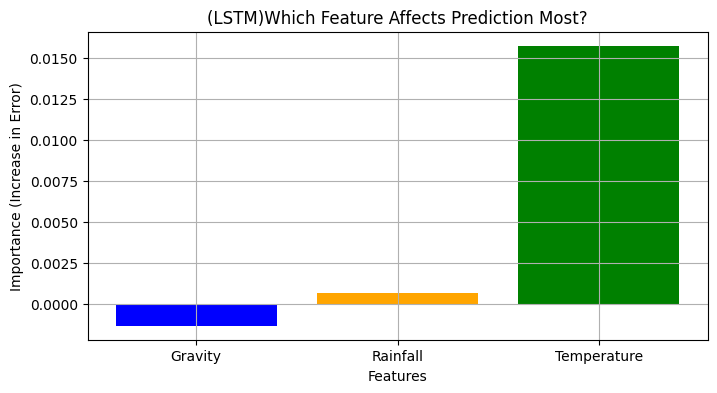

In [61]:
feature_list = ['Gravity', 'Rainfall', 'Temperature']

explain_model_decision(
    model_lstm,
    x_LG_test,
    y_test,
    feature_list
)


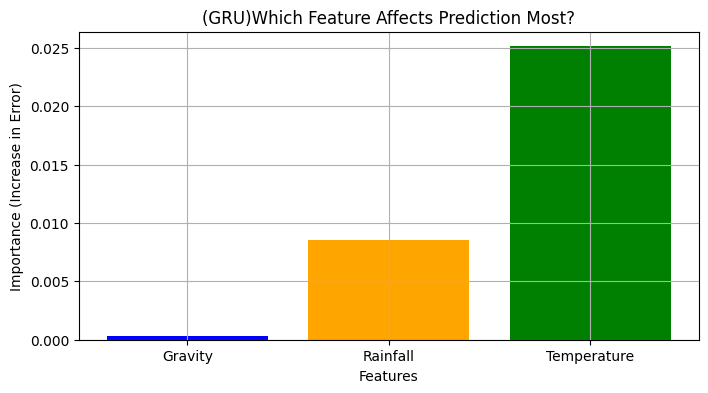

In [63]:
feature_list = ['Gravity', 'Rainfall', 'Temperature']

explain_model_decision(
    model_gru,
    x_LG_test,
    y_test,
    feature_list
)

In [ ]:
#MC Dropout LSTM

import numpy as np

def predict_uncertainty(model, data, n_iter=50):
    
    predictions = []

    # Step 1: predict same data again and again
    for i in range(n_iter):
        preds = model(data, training=True)   # Dropout ON
        predictions.append(preds)

    # Step 2: List → Array
    predictions = np.array(predictions)   # shape: (50, 1, 1)

    # Step 3: Mean (final prediction)
    mean_prediction = predictions.mean(axis=0)

    # Step 4: Std (uncertainty / confusion)
    uncertainty = predictions.std(axis=0)

    return mean_prediction, uncertainty


idx = 0
sample_data = x_LG_test[idx:idx+1]

mean_pred_lstm, conf_score = predict_uncertainty(
    model_lstm,
    sample_data,
    n_iter=50
)

print(f"Prediction(LSTM) : {mean_pred_lstm[0][0]:.2f} meters")
print(f"Uncertainty(LSTM) : {conf_score[0][0]:.4f} (lower is better)")



Prediction(LSTM) : 0.35 meters
Uncertainty(LSTM) : 0.0543 (lower is better)


In [ ]:
#MC Dropout GRU

import numpy as np

def predict_uncertainty(model, data, n_iter=50):
    
    predictions = []

    
    for i in range(n_iter):
        preds = model(data, training=True)   
        predictions.append(preds)

   
    predictions = np.array(predictions)   

   
    mean_prediction = predictions.mean(axis=0)

    
    uncertainty = predictions.std(axis=0)

    return mean_prediction, uncertainty


idx = 0
sample_data = x_LG_test[idx:idx+1]

mean_pred_gru, conf_score = predict_uncertainty(
    model_gru,
    sample_data,
    n_iter=50
)

print(f"Prediction(GRU) : {mean_pred_gru[0][0]:.2f} meters")
print(f"Uncertainty(GRU) : {conf_score[0][0]:.4f} (lower is better)")

Prediction(GRU) : 0.50 meters
Uncertainty(GRU) : 0.0624 (lower is better)


In [70]:
#Ethics

def ethical_water_monitor(
    predicted_level,
    uncertainty,
    level_threshold=10.0,
    uncertainty_threshold=0.05
):
    print("\n========== Ethical Groundwater Report ==========")

    print(f"Predicted Water Level : {predicted_level:.2f} meters")
    print(f"Model Uncertainty     : {uncertainty:.4f}")

    # Case 1: Model is not confident
    if uncertainty > uncertainty_threshold:
        print("\nStatus : ⚠️ UNCERTAIN PREDICTION")
        print("Action : Human expert review required before decision.")
        print("Reason : Model is confused, unsafe to trust blindly.")

    # Case 2: Water level is critically low
    elif predicted_level < level_threshold:
        print("\nStatus : 🔴 CRITICAL LOW WATER LEVEL")
        print("Action : STOP groundwater pumping immediately.")
        print("Reason : Drinking water preservation is priority.")

    # Case 3: Everything looks safe
    else:
        print("\nStatus : 🟢 SAFE WATER LEVEL")
        print("Action : Controlled irrigation use allowed.")
        print("Reason : Water level and model confidence are acceptable.")

    print("===============================================\n")


In [67]:
ethical_water_monitor(
    predicted_level = mean_pred_lstm[0][0],
    uncertainty     = conf_score[0][0],
    level_threshold = 10.0,
    uncertainty_threshold = 0.05
)



========== Ethical Groundwater Report(LSTM) ==========
Predicted Water Level : 0.35 meters
Model Uncertainty     : 0.0624

Status : ⚠️ UNCERTAIN PREDICTION
Action : Human expert review required before decision.
Reason : Model is confused, unsafe to trust blindly.



In [69]:
ethical_water_monitor(
    predicted_level = mean_pred_gru[0][0],
    uncertainty     = conf_score[0][0],
    level_threshold = 10.0,
    uncertainty_threshold = 0.05
)


========== Ethical Groundwater Report(GRU) ==========
Predicted Water Level : 0.50 meters
Model Uncertainty     : 0.0624

Status : ⚠️ UNCERTAIN PREDICTION
Action : Human expert review required before decision.
Reason : Model is confused, unsafe to trust blindly.

